<a href="https://colab.research.google.com/github/Clairekmkim/Clairekmkim/blob/main/titanic_survival_prediction_with_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully!
Data shape: (891, 15)

First few rows of the data:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Training data shape: (623, 4)
Test data shape: (268, 4)

Model Coefficients:
sex: 2.5584
age: -0.0400
FirstClass: 2.3822
SecondClass: 1.0516


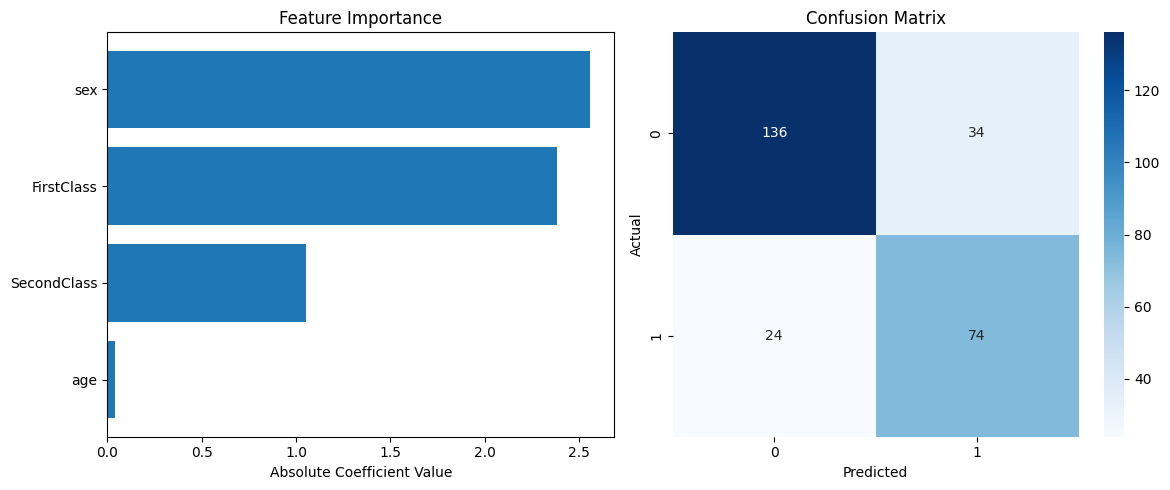


Confusion Matrix Interpretation:
True Negatives (correctly predicted non-survivors): 136
False Positives (incorrectly predicted survivors): 34
False Negatives (incorrectly predicted non-survivors): 24
True Positives (correctly predicted survivors): 74


"\nFeature Description:\n- sex: Passenger's gender (1: female, 0: male)\n- age: Passenger's age (mean imputed for missing values)\n- FirstClass: Whether passenger was in first class (1: yes, 0: no)\n- SecondClass: Whether passenger was in second class (1: yes, 0: no)\n"

In [10]:
"""
Titanic Survival Prediction using Logistic Regression
"""

# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
print("Data loaded successfully!")
print("Data shape:", titanic.shape)
print("\nFirst few rows of the data:")
print(titanic.head())

# Data preprocessing
# Convert gender to numeric (female: 1, male: 0)
titanic['sex'] = titanic['sex'].map({'female': 1, 'male': 0})

# Handle missing values in Age column (수정된 부분)
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

# Create dummy variables for passenger class
titanic['FirstClass'] = (titanic['pclass'] == 1).astype(int)
titanic['SecondClass'] = (titanic['pclass'] == 2).astype(int)

# Split features and target
X_titanic = titanic[['sex', 'age', 'FirstClass', 'SecondClass']]
y_titanic = titanic['survived']

# Split data into training and test sets
train_x_titanic, test_x_titanic, train_y_titanic, test_y_titanic = train_test_split(
    X_titanic, y_titanic, test_size=0.3, random_state=123
)

print("\nTraining data shape:", train_x_titanic.shape)
print("Test data shape:", test_x_titanic.shape)

# Train logistic regression model
try:
    # Create and train model (수정된 부분)
    logistic = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    logistic.fit(train_x_titanic, train_y_titanic)

    # Print model coefficients
    print("\nModel Coefficients:")
    for feature, coef in zip(X_titanic.columns, logistic.coef_[0]):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {logistic.intercept_[0]:.4f}")

    # Make predictions
    test_y_prediction = logistic.predict(test_x_titanic)

    # Calculate and print model performance
    train_accuracy = logistic.score(train_x_titanic, train_y_titanic)
    test_accuracy = logistic.score(test_x_titanic, test_y_titanic)

    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    print(f"\nActual survivors: {test_y_titanic.sum()}")
    print(f"Predicted survivors: {test_y_prediction.sum()}")

    # Create visualizations
    plt.figure(figsize=(12, 5))

    # Feature importance plot
    plt.subplot(1, 2, 1)
    feature_importance = pd.DataFrame({
        'feature': X_titanic.columns,
        'importance': abs(logistic.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=True)

    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance')
    plt.xlabel('Absolute Coefficient Value')

    # Confusion matrix plot
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(test_y_titanic, test_y_prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Print confusion matrix interpretation
    print("\nConfusion Matrix Interpretation:")
    print(f"True Negatives (correctly predicted non-survivors): {cm[0,0]}")
    print(f"False Positives (incorrectly predicted survivors): {cm[0,1]}")
    print(f"False Negatives (incorrectly predicted non-survivors): {cm[1,0]}")
    print(f"True Positives (correctly predicted survivors): {cm[1,1]}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

"""
Feature Description:
- sex: Passenger's gender (1: female, 0: male)
- age: Passenger's age (mean imputed for missing values)
- FirstClass: Whether passenger was in first class (1: yes, 0: no)
- SecondClass: Whether passenger was in second class (1: yes, 0: no)
"""